In [1]:
%matplotlib inline
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from collections import OrderedDict

# ファイル読み込み

In [2]:
with open('../data/gdsc/PANCANCER_IC_Wed Oct 10 03_15_39 2018.pkl', 'rb') as f:
    ic_df = pickle.load(f)

with open('../data/cellosaurus/gdsc_cellosaurus.pkl', 'rb') as f:
    cellosaurus_df = pickle.load(f)

# 生データ 一部確認

In [3]:
# 細胞株薬剤評価
print('(sample, category) = {}'.format(ic_df.shape))
ic_df.head(10)

(sample, category) = (224202, 14)


,Drug name,Drug Id,Cell line name,Cosmic sample Id,TCGA classification,Tissue,Tissue sub-type,IC Result ID,IC50,AUC,Max conc,RMSE,Z score,Dataset version
0,Erlotinib,1,MC-CAR,683665,MM,blood,haematopoietic_neoplasm_other,1,2.453524,0.982610,2.0,0.021678,-0.015505,17.3
1,Erlotinib,1,ES3,684055,UNCLASSIFIED,bone,ewings_sarcoma,1482,3.376592,0.985169,2.0,0.029915,0.779999,17.3
2,Erlotinib,1,ES5,684057,UNCLASSIFIED,bone,ewings_sarcoma,1791,3.614664,0.983207,2.0,0.031201,0.985170,17.3
3,Erlotinib,1,ES7,684059,UNCLASSIFIED,bone,ewings_sarcoma,2177,3.223394,0.984574,2.0,0.093857,0.647971,17.3
4,Erlotinib,1,EW-11,684062,UNCLASSIFIED,bone,ewings_sarcoma,2754,2.486405,0.946034,2.0,0.087280,0.012832,17.3
5,Erlotinib,1,SK-ES-1,684072,UNCLASSIFIED,bone,ewings_sarcoma,3333,2.048918,0.951604,2.0,0.015758,-0.364196,17.3
6,Erlotinib,1,NCI-H1395,684681,LUAD,lung,lung_NSCLC_adenocarcinoma,3878,4.198994,0.982545,2.0,0.029594,1.488747,17.3
7,Erlotinib,1,COLO-829,687448,SKCM,skin,melanoma,4337,3.101688,0.952900,2.0,0.179313,0.543086,17.3
8,Erlotinib,1,8-MG-BA,687562,GBM,nervous_system,glioma,8856,2.580268,0.980663,2.0,0.041394,0.093723,17.3
9,Erlotinib,1,GB-1,687568,GBM,nervous_system,glioma,9875,3.322689,0.976825,2.0,0.095117,0.733545,17.3


In [4]:
# cellosaurusのIDとcosmic_sample_idの対応表
print('(sample, category) = {}'.format(cellosaurus_df.shape))
cellosaurus_df.head(10)

(sample, category) = (1073, 2)


,ID,GDSC
1,201T,1287381
2,22Rv1,924100
3,23132/87,910924
4,42-MG-BA,687561
5,451Lu,1287706
6,5637,687452
7,639V,906798
8,647V,906797
9,697,906800
10,769-P,910922


In [5]:
# GDSC 細胞株数
gdsc_cosmic_id = list(set(ic_df['Cosmic sample Id']))
cellosaurus_cosmic_id = list(set(cellosaurus_df['GDSC']))
l_duplicate = [x for x in gdsc_cosmic_id if str(x) in cellosaurus_cosmic_id]
print('GDSC cell line num: {}'.format(len(l_duplicate)))

GDSC cell line num: 1062


# IC50分布確認

OrderedDict([('low', 180949), ('middle', 26062), ('high', 17191)])


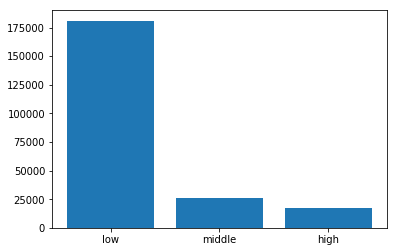

In [6]:
high_th = -2.3
low_th = 0

high_ic50 = ic_df['IC50'] < high_th
mid_ic50 = ((high_th <= ic_df['IC50']) & (ic_df['IC50'] <= low_th))
low_ic50 = low_th < ic_df['IC50']

ic_dict = OrderedDict()
ic_dict['low'] = low_ic50.sum()
ic_dict['middle'] = mid_ic50.sum()
ic_dict['high'] = high_ic50.sum()
plt.bar(ic_dict.keys(), ic_dict.values())
print(ic_dict)

# AUC分布確認

OrderedDict([('low', 189955), ('middle', 26709), ('high', 7538)])


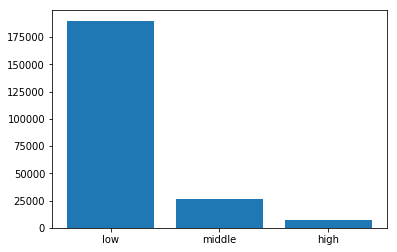

In [7]:
high_th = 0.33
low_th = 0.66

high_auc = ic_df['AUC'] < high_th
mid_auc = ((high_th <= ic_df['AUC']) & (ic_df['AUC'] <= low_th))      
low_auc = low_th < ic_df['AUC']
auc_dict = OrderedDict()
auc_dict['low'] = low_auc.sum()
auc_dict['middle'] = mid_auc.sum()
auc_dict['high'] = high_auc.sum()
plt.bar(auc_dict.keys(), auc_dict.values())
print(auc_dict)